In [2]:
from scipy import signal
import numpy as np
import math as mt
import matplotlib.pyplot as plt

In [3]:
#Resposta na amostra do filtro ideal

n=np.array(range(-200,200))

N=60
wc= 2*mt.pi/N
hd=np.sin(wc*n)/(mt.pi*n)
hd[np.argwhere(np.isnan(hd))[0][0]]=wc/mt.pi

fig = plt.subplots(figsize=(10,10))
#plt.subplots_adjust(wspace=.5, hspace=.8)

ax1=plt.subplot(2, 1, 1)  
ax1.stem(n,hd)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Tempo')
ax1.set_title('Hd')

ax2=plt.subplot(2, 1, 2)  
ax2.stem(n,np.sin(wc*n))
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Tempo')
ax2.set_title('sen(wc*n)')



/home/mrclnndrd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


Text(0.5,1,'sen(wc*n)')

In [ ]:
len(hd)




/home/mrclnndrd/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5, 1.0, 'Win')

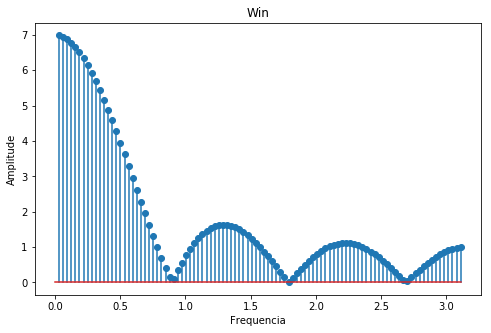

In [95]:
#Resposta em Frequencia da Janela

omega=mt.pi*np.array(range(-100,100))/100

M=6
Win=(np.sin(omega*(M+1)/2)/np.sin(omega/2))*np.exp(-1j*omega*(M+1)/2)

fig = plt.subplots(figsize=(20,5))
plt.subplots_adjust(wspace=.5, hspace=.8)

ax1=plt.subplot(1, 2, 1)  
ax1.stem(omega[int(-len(omega)/2):], (abs(Win[int(-len(omega)/2):])))
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Frequencia')
ax1.set_title('Win')

tap = 5
[[-2.          0.15136535]
 [-1.          0.18709786]
 [ 0.          0.2       ]
 [ 1.          0.18709786]
 [ 2.          0.15136535]]


/home/mrclnndrd/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<StemContainer object of 3 artists>

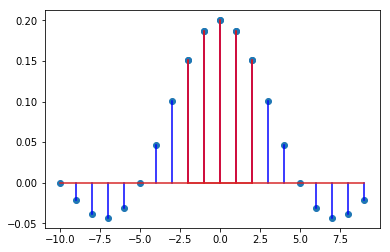

In [77]:
#### Calcular os coeficientes do Filtro Passa-Baixo FIR com 3-
#tap, com frequência de corte 800 Hz e frequência de
#amostragem 8000 amostras/s
import pandas as pd

fc=1000
fs=8000

wc=2*mt.pi*800/8000

n=[]
h=[]
for nx in range(-10,10):
    if nx==0:
        n.append(nx)
        h.append(wc/mt.pi)
    else:
        n.append(nx)
#        h.append(wc/mt.pi*np.sin(wc*nx)/(wc*nx))
        h.append(np.sin(wc*nx)/(mt.pi*nx))

result=pd.DataFrame([n,h]).transpose()
result.columns=['n','h']
plt.stem(result['n'],result['h'],'b')

#print(wc/mt.pi)


tr=3
print('tap = '+str(2*tr-1))

hf=result[result['n']<tr][result['n']>-tr].values
print(hf)
plt.stem(result['n'][int(len(result)/2)-tr+1:-int(len(result)/2)+tr],result['h'][int(len(result)/2)-tr+1:-int(len(result)/2)+tr],'r')


In [25]:
hf[2][1]

0.1870978567577278

[0.151, -0j]
[0.187, -1j]
[0.2, -2j]
[0.187, -3j]
[0.151, -4j]


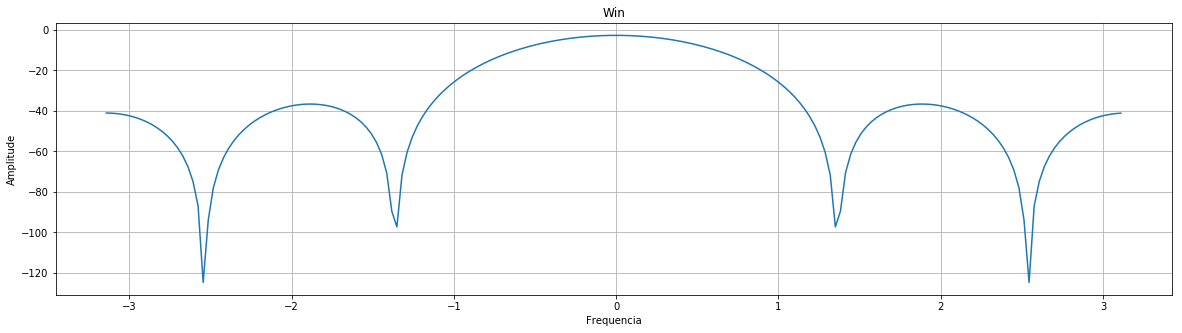

In [78]:

w=mt.pi*np.array(range(-100,100))/100
rf=0
for k in range(len(hf)):
    
    print([round(hf[k][1],3),-complex(0,1)*k])
    rf+=hf[k][1]*np.exp(-complex(0,1)*k*w)


fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1, 1, 1)  
ax1.plot(w, 20*np.log(abs(rf)))
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Frequencia')
ax1.set_title('Win')
ax1.grid()

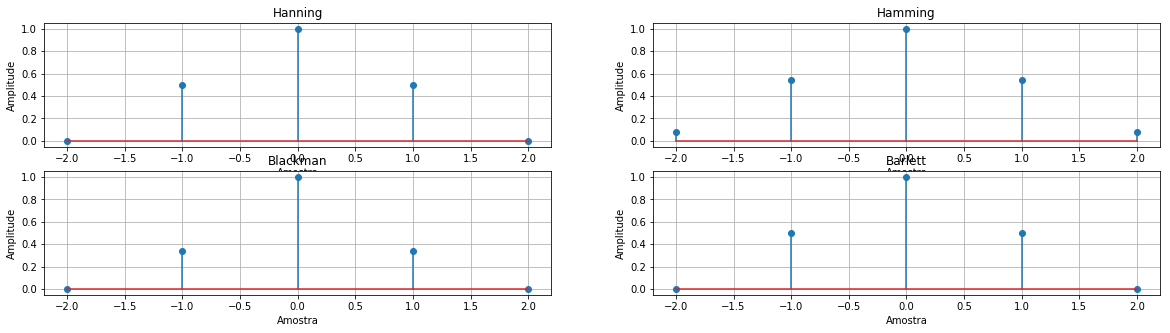

In [79]:
M=2
n=np.array(range(-M,M+1))
Hanning=1/2+1/2*np.cos(n*mt.pi/M)  
Hamming=0.54+0.46*np.cos(n*mt.pi/M) 
Blackman=0.42+0.5*np.cos(n*mt.pi/M)+0.08*np.cos(2*n*mt.pi/M) 
Barlett=1-abs(n)/M

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(2, 2, 1)  
ax1.stem(n, Hanning)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Amostra')
ax1.set_title('Hanning')
ax1.grid()

ax2=plt.subplot(2, 2, 2)  
ax2.stem(n, Hamming)
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Amostra')
ax2.set_title('Hamming')
ax2.grid()

ax3=plt.subplot(2, 2, 3)  
ax3.stem(n, Blackman)
ax3.set_ylabel('Amplitude')
ax3.set_xlabel('Amostra')
ax3.set_title('Blackman')
ax3.grid()


ax4=plt.subplot(2, 2, 4)  
ax4.stem(n, Barlett)
ax4.set_ylabel('Amplitude')
ax4.set_xlabel('Amostra')
ax4.set_title('Barlett')
ax4.grid()

[-2.100616149471482e-18, 0.06361327129762746, 0.19999999999999998, 0.06361327129762746, -2.100616149471482e-18]
[-0.0, -0j]
[0.064, -1j]
[0.2, -2j]
[0.064, -3j]
[-0.0, -4j]


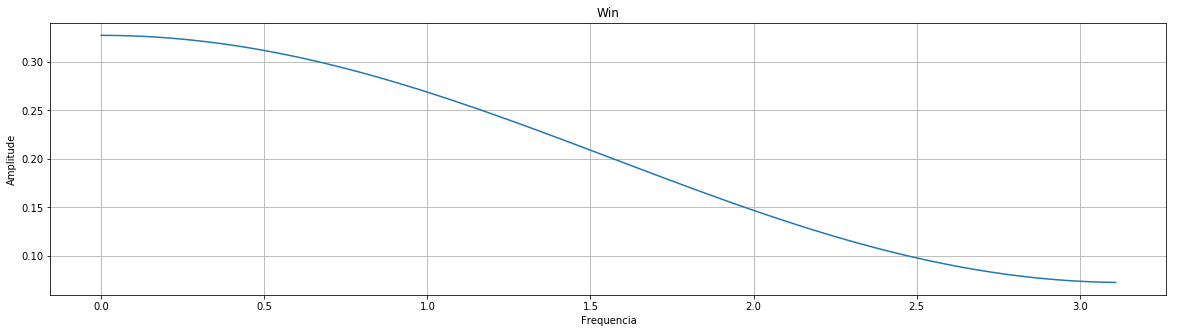

In [82]:
hfw=[hf[i][1]*Blackman[i] for i in range(len(Blackman))]
print(hfw)
w=mt.pi*np.array(range(-100,100))/100
rf=0
for k in range(len(hf)):
    
    print([round(hfw[k],3),-complex(0,1)*k])
    rf+=hfw[k]*np.exp(-complex(0,1)*k*w)


fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1, 1, 1)  
ax1.plot(w[int(len(w)/2):], (abs(rf[int(len(w)/2):])))
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Frequencia')
ax1.set_title('Win')
ax1.grid()

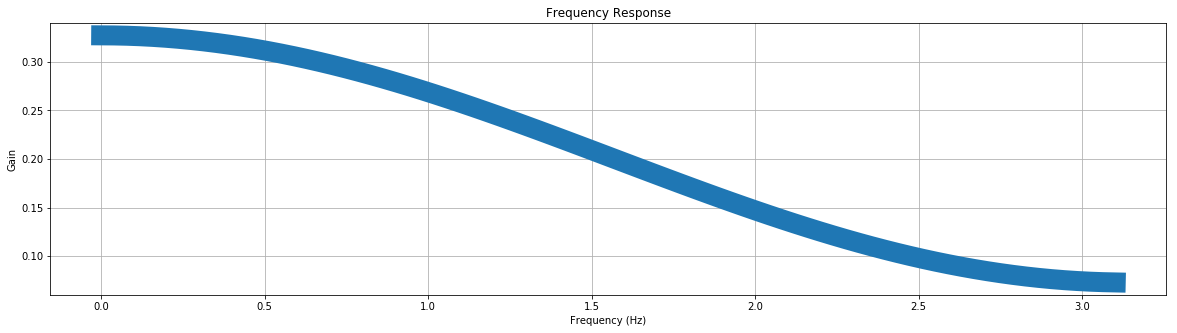

In [94]:
# ------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show

fig = plt.subplots(figsize=(20,5))

clf()
w, h = freqz(hfw, worN=80)
plot(w, absolute(h),linewidth=20)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
#ylim(-0.05, 1.05)
grid(True)

In [96]:
#!python https://scipy-cookbook.readthedocs.io/items/FIRFilter.html

from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show

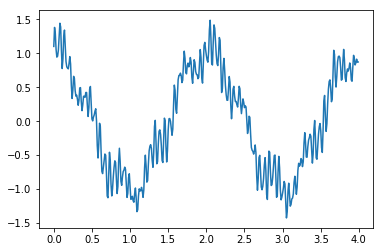

In [98]:
#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = 100.0 #100 sample/second
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)

plt.plot(t,x)

In [106]:
#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
#Window types:

#boxcar, triang, blackman, hamming, hann, bartlett, flattop, 
#parzen, bohman, blackmanharris, nuttall, barthann, kaiser 
#(needs beta), gaussian (needs std), general_gaussian (needs power, width), 
#slepian (needs width), chebwin (needs attenuation)


taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

In [107]:
N

74

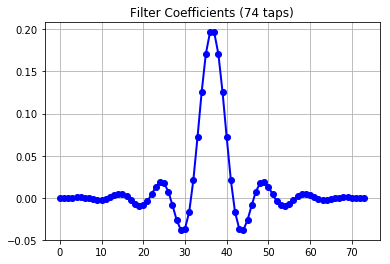

In [108]:
#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

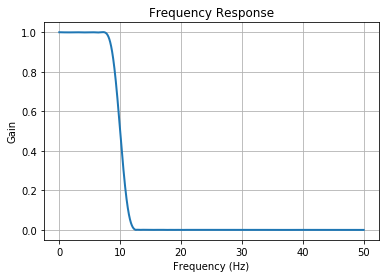

In [116]:
#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, abs(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

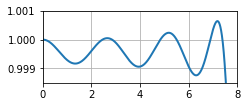

In [118]:
# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

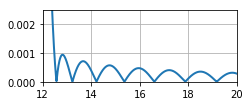

In [119]:
# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)

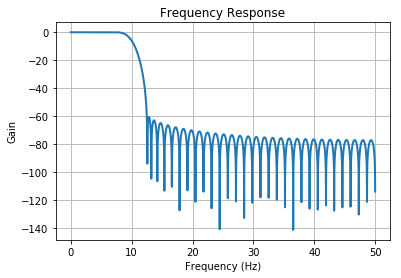

In [120]:
#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, 20 * np.log10(absolute(h)), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
#ylim(-0.05, 1.05)
grid(True)

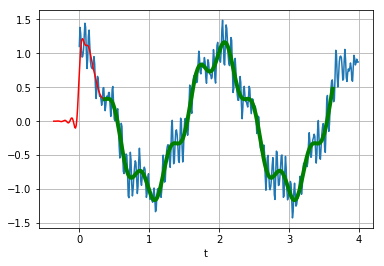

In [123]:
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(3)
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)

show()